<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 04  </font></center></h1>
<h2><center> <font color='black'> Cross-Selling/ Up-selling & Recommendation System</font></center></h2>   
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2021</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**18 April at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).

- Please <font color='red'>do not change</font> the template of this notebook file. You can download the .ipynb file and work on that.


### The homework is divided into four sections and the points are distributed as below:
<pre>
- Market Basket Analysis            -> 2.0 points
- Collaborative Filtering           -> 3.5 points
- Recommender Systems Evaluation    -> 1.0 points
- Neural Network                    -> 2.5 points
_________________________________________________
Total                               -> 9.0 points
</pre>

# 1.  Market Basket Analysis (2 points)

**1.1 Consider the following businesses and think about one case of cross selling and one case of up selling techniques they could use. This question is not restricted to only traditional, standard examples.(1 points)**

a. An OnlineTravel Agency like Booking.com or AirBnB

<font color='red'> **Cross selling:**</font> When you are booking an accomodation, the landlord could offer you home utilities such as iron or additional beds for additional costs

<font color='red'> **Up selling:**</font> When you are booking an accomodation, the landlord can offer transfer from and to airport

b. A software company which produces products related to cyber security like Norton, Kaspersky, Avast and similar ones. 

<font color='red'> **Cross selling:**</font> When you purchasing one of their product, company can offer additional functionalities such as "Safe money", "VPN", "Safe kids"

<font color='red'> **Up selling:**</font> When you purchasing free product, company can offer more advanced and upgraded version (Total Security in Kaspersky)

c. A company that sells cell phones 

<font color='red'> **Cross selling:**</font> When you purchasing a cell phone, company can offer you some accessories which is related with this product

<font color='red'> **Up selling:**</font> When you purchasing an iPhone 12 mini, company can offer you iPhone 12 pro max which is more advanced and better.

d. A supermarket like Konsum, Rimi, Maxima etc. 

<font color='red'> **Cross selling:**</font> When you are buying a frying pan, supermarket can offer you a cover for frying pan

<font color='red'> **Up selling:**</font> When you are purchasing juice called "Fresh", supermarket can offer you "Cappy" which more pricy than "Fresh"

**1.2 Let's suppose that our client is a retail company that has an online shop. They gave us a dataset about online sales of their products. The client wants to know which product bundles to promote. Find 5 association rules with the highest lift.**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('OnlineRetailPurchase.csv', header=0 )

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**1.3 Use describe function from pandas to get statistical information about the values in the dataframe.(0.2 points)**

In [ ]:
#TODO
#df.describe()
#First result shows that min of Quantity is negative. So, there is something wrong with it.
#sum(df['Quantity'] < 0)

df = df[(df["Quantity"] > 0)]
#Reference: https://www.javaer101.com/en/article/36013512.html
df.describe()

,Quantity,UnitPrice,CustomerID
count,9870.000000,9870.000000,7609.000000
mean,9.169301,3.837023,15620.763832
std,45.747927,14.391451,1755.451331
min,1.000000,0.000000,12395.000000
25%,1.000000,1.250000,14388.000000
50%,3.000000,2.510000,15640.000000
75%,8.000000,4.210000,17228.000000
max,2880.000000,887.520000,18239.000000


**1.4 Create a dataframe name as "Basket", where each row has an distintive value of InvoiceNo and each column has a distinctive Description. The cells in the table contain the count of each item (Description) mentioned in one invoice. For example basket.loc['536365','WHITE HANGING HEART T-LIGHT HOLDER'] has a value of 1 because the product with WHITE HANGING HEART T-LIGHT HOLDER was entered  only once in the invoice 536365. (0.2 points)**

In [ ]:
#TODO
basket = pd.DataFrame(df.groupby(["InvoiceNo", "Description"]).size().unstack().fillna(0).replace(-np.inf,0))
#Reference Lab7 and https://stackoverflow.com/questions/37121515/pandas-how-to-group-and-unstack-on-multiple-variables
#Also we have seen that some cells are shown as NaN value and infinite so we change them to 0

#print(basket.loc['536365','WHITE HANGING HEART T-LIGHT HOLDER'])


basket

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAL COOKIE CUTTERS SET,3 TRADITIONAl BISCUIT CUTTERS SET,3 WHITE CHOC MORRIS BOXED CANDLES,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE POSY,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,...,WOODEN PICTURE FRAME WHITE FINISH,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND PARTY BAG + STICKER SET,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WOVEN BERRIES CUSHION COVER,WRAP PINK FLOCK,WRAP CHRISTMAS SCREEN PRINT,WRAP CHRISTMAS VILLAGE,WRAP COWBOYS,WRAP ENGLISH ROSE,WRAP GREEN PEARS,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,"WRAP, BILLBOARD FONTS DESIGN",YELLOW BREAKFAST CUP AND SAUCER,YELLOW COAT RACK PARIS FASHION,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW SHARK HELICOPTER,YELLOW/PINK CERAMIC CANDLE HOLDER,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK,amazon
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

**1.5 Some products are mentioned more than once in one invoice. You can check the maximum number for each column to verify. Modify your dataframe such that every cell which has a value higher than one will be replaced with 1. If the cell has the value 0 it will remain the same. (0.2 points)** <br>
NB: If your implementation in 1.4 already takes care of this, please skip the question. 

In [ ]:
#TODO
#basket.describe()
basket.astype('int32').dtypes
#The values were not an integer, it was impossible to make a comparison

def change(x):
  if x >= 1:
    return 1
  if x == 0:
    return 0

basket = basket.applymap(change)

basket.describe()

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAL COOKIE CUTTERS SET,3 TRADITIONAl BISCUIT CUTTERS SET,3 WHITE CHOC MORRIS BOXED CANDLES,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE POSY,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,...,WOODEN PICTURE FRAME WHITE FINISH,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND PARTY BAG + STICKER SET,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WOVEN BERRIES CUSHION COVER,WRAP PINK FLOCK,WRAP CHRISTMAS SCREEN PRINT,WRAP CHRISTMAS VILLAGE,WRAP COWBOYS,WRAP ENGLISH ROSE,WRAP GREEN PEARS,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP SUKI AND FRIENDS,"WRAP, BILLBOARD FONTS DESIGN",YELLOW BREAKFAST CUP AND SAUCER,YELLOW COAT RACK PARIS FASHION,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW SHARK HELICOPTER,YELLOW/PINK CERAMIC CANDLE HOLDER,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK,amazon
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.004695,0.002347,0.039906,0.030516,0.007042,0.002347,0.007042,0.018779,0.023474,0.037559,0.032864,0.004695,0.009390,0.014085,0.014085,0.002347,0.007042,0.009390,0.009390,0.007042,0.007042,0.004695,0.025822,0.007042,0.014085,0.030516,0.002347,0.023474,0.016432,0.009390,0.004695,0.004695,0.002347,0.007042,0.023474,0.014085,0.002347,0.009390,0.011737,0.011737,...,0.053991,0.009390,0.016432,0.021127,0.018779,0.009390,0.011737,0.023474,0.002347,0.011737,0.002347,0.018779,0.004695,0.002347,0.004695,0.002347,0.002347,0.002347,0.004695,0.004695,0.004695,0.002347,0.002347,0.004695,0.007042,0.009390,0.007042,0.002347,0.011737,0.002347,0.002347,0.021127,0.016432,0.009390,0.004695,0.002347,0.004695,0.030516,0.018779,0.004695
std,0.068438,0.048450,0.195969,0.172206,0.083720,0.048450,0.083720,0.135905,0.151582,0.190350,0.178490,0.0

**1.5 We do not need to spend time on calculating the association rules by ourselves as there already exists a package for python to do so, called mlxtend. We are going to use the mlxtend package to find frequent items bought together and then create some rules on what to recomend to a user based on what he/she/they have bought. We have given you the first part of the code which calculates the frequent items bought together. (0.2 points)**

In [ ]:
#!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import math

In [ ]:
#TODO
f_items = apriori(basket, min_support=0.05, use_colnames=True)
f_items.head()

#Reference: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

,support,itemsets
0,0.056338,(60 CAKE CASES VINTAGE CHRISTMAS)
1,0.058685,(ALARM CLOCK BAKELIKE GREEN)
2,0.075117,(ASSORTED COLOUR BIRD ORNAMENT)
3,0.065728,(CHOCOLATE HOT WATER BOTTLE)
4,0.056338,(CREAM CUPID HEARTS COAT HANGER)


**Please read the documentation of the associaton rules function in mlextend [here](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) and complete the code so we get the 5 rules with the highest lift. Print those rules. For example if user bought product basket A then  the algorithm recommends product basket B. (0.2 points)**

In [ ]:


rules = association_rules(f_items, metric="confidence", min_threshold=0.7) 
#TODO



for index, row in (rules.iloc[:5]).iterrows():
    print("If the customer buys " + str(row['antecedents']))
    print("")
    print("The recommender recommends "+str(row['consequents']))
    print("")
    print("")
    print("")



If the customer buys frozenset({'HAND WARMER SCOTTY DOG DESIGN'})

The recommender recommends frozenset({'HAND WARMER OWL DESIGN'})



If the customer buys frozenset({'RED WOOLLY HOTTIE WHITE HEART.'})

The recommender recommends frozenset({'KNITTED UNION FLAG HOT WATER BOTTLE'})



If the customer buys frozenset({'KNITTED UNION FLAG HOT WATER BOTTLE'})

The recommender recommends frozenset({'RED WOOLLY HOTTIE WHITE HEART.'})



If the customer buys frozenset({'HAND WARMER RED RETROSPOT', 'HAND WARMER OWL DESIGN'})

The recommender recommends frozenset({'HAND WARMER SCOTTY DOG DESIGN'})



If the customer buys frozenset({'HAND WARMER RED RETROSPOT', 'HAND WARMER SCOTTY DOG DESIGN'})

The recommender recommends frozenset({'HAND WARMER OWL DESIGN'})





# 2. Collaborative filtering (3.5 points )

We are going to use Books.csv dataset which contains  ratings from Amazon website and the data has the following features:

UserID: The ID of the users who read the books

BookTitle: The title of the book

Book-Rating: A rating given to the book in a scale from 0 to 10

Below we are going to perform the same steps we did with movies dataset in the practice session

**2.0 Load the dataset and take a look at the books titles. And pick a favorite book (any book).(0.1 points)**

In [ ]:
df_book = pd.read_csv('Books.csv', header=0 )
df_book.head()



,UserID,Book-Rating,BookTitle
0,6181,0,Flesh Tones: A Novel
1,62,5,Flesh Tones: A Novel
2,163,0,Flesh Tones: A Novel
3,212,5,Flesh Tones: A Novel
4,250,9,Flesh Tones: A Novel


**2.1 You have to apply KNN algorithm for collaborative filtering. As KNN algorithm does not accept strings, use a Label Encoder for BookTitle column.After that reshape the books matrix so that every column will be a UserID and every row a BookTitle. (0.45 points)**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_book_label = df_book.copy()
df_book_label['BookTitle'] = labelencoder.fit_transform(df_book_label['BookTitle'])
#df_book_label

#Reference: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

df_book_pivot = pd.pivot_table(df_book_label, values='Book-Rating', index="BookTitle", columns=['UserID']).fillna(0)
#Reference: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

df_book_pivot

#TODO

UserID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6252,6253,6254,6255,6256,6257,6258,6259,6260,6261,6262,6263,6264,6265,6266,6267,6268,6269,6270,6271,6272,6273,6274,6275,6276,6277,6278,6279,6280,6281,6282,6283,6284,6285,6286,6287,6288,6289,6290,6291
BookTitle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**2.2 Build a sparse matrix for books data and show it. (0.45 points)**

In [ ]:
from scipy.sparse import csr_matrix
df_book_sparse = csr_matrix(df_book_pivot.values)
print(f"Sparse matrix:\n{df_book_sparse}")
#TODO

Sparse matrix:
  (1, 6228)	5.0
  (2, 365)	7.0
  (2, 5110)	9.0
  (2, 5226)	10.0
  (2, 6209)	10.0
  (3, 91)	7.0
  (3, 135)	8.0
  (3, 139)	10.0
  (3, 258)	9.0
  (3, 429)	6.0
  (3, 760)	5.0
  (3, 821)	6.0
  (3, 869)	9.0
  (3, 984)	10.0
  (3, 1328)	5.0
  (3, 1425)	10.0
  (3, 1781)	2.0
  (3, 1815)	9.0
  (3, 1820)	9.0
  (3, 1951)	8.0
  (3, 2360)	8.0
  (3, 2384)	8.0
  (3, 2449)	9.0
  (3, 2468)	7.0
  (3, 2956)	5.0
  :	:
  (333, 3411)	4.0
  (333, 3416)	1.0
  (333, 3433)	8.0
  (333, 3445)	5.0
  (333, 3450)	2.0
  (333, 3456)	4.0
  (333, 3461)	8.0
  (333, 3491)	2.0
  (333, 3497)	1.0
  (333, 3501)	4.0
  (333, 3518)	8.0
  (333, 3519)	3.0
  (333, 3527)	7.0
  (333, 3543)	7.0
  (333, 3546)	9.0
  (333, 3547)	7.0
  (333, 3573)	5.0
  (333, 3575)	1.0
  (333, 3581)	7.0
  (333, 3597)	3.0
  (333, 3602)	6.0
  (333, 3666)	3.0
  (333, 3668)	9.0
  (333, 6250)	2.0
  (333, 6277)	9.0


**2.3 Initialize and train two different KNN models (use cosine metric for similarity for both) but with different n_neighbours, 2 and 10. Recommend top 5 books based on your favourite one in both cases (1 points)**<br>
NB: You are free to choose a favorite book (any book) based on which you have to recommend 5 books.

In [ ]:
from sklearn.neighbors import NearestNeighbors
model_knn1 = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=2, n_jobs=-1)
model_knn2 = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)

model_knn1.fit(df_book_sparse)
model_knn2.fit(df_book_sparse)
#TODO

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                 radius=1.0)

In [ ]:
df_book_label = df_book_label.rename(columns={"BookTitle": "BookLabel"})

df_label_title = pd.concat([df_book_label, df_book], axis = 1)
df_label_title = df_label_title[['BookLabel', 'BookTitle']]
df_label_title = df_label_title.drop_duplicates()

#We have created the new dataframe in order to see the booklabels and booktitles together. Also it would help us to solve this task
#df_label_title

In [ ]:
book_to_idx = {
    book: i for i, book in enumerate(list(df_label_title.set_index('BookLabel').loc[df_book_pivot.index].BookTitle))
}
#book_to_idx

In [ ]:
#!pip install fuzzywuzzy


In [ ]:
from fuzzywuzzy import fuzz

def fuzzy_matching(mapper, fav_book, verbose=True):
    """
    return the closest match via fuzzy ratio. If no match found, return None
    
    Parameters
    ----------    
    mapper: dict, map book title name to index of the book in data

    fav_book: str, name of user input book
    
    verbose: bool, print log if True

    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_book.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
            
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]



def make_recommendation(model_knn, data, mapper, fav_book, n_recommendations):
    """
    return top n similar book recommendations based on user's input book


    Parameters
    ----------
    model_knn: sklearn model, knn model

    data: book-user matrix

    mapper: dict, map book title name to index of the book in data

    fav_book: str, name of user input book

    n_recommendations: int, top n recommendations

    Return
    ------
    list of top n similar book recommendations
    """
    # fit
    model_knn.fit(data)
    
    # get input book index
    print('You have input book:', fav_book)
    idx = fuzzy_matching(mapper, fav_book, verbose=True)
    
    # inference
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_book))
    for i, (idx, dist) in reversed(list(enumerate(raw_recommends))):
        #j =i
        print('{0}: {1}, with distance of {2}'.format(n_recommendations-i, reverse_mapper[idx], dist))

In [ ]:
#KNN1
my_favorite = 'Harry Potter and the Prisoner of Azkaban'

make_recommendation(
    model_knn=model_knn1, # trained model (model)
    data=df_book_sparse, # sparse matrix (data)
    fav_book=my_favorite, # fav_book
    mapper=book_to_idx, # {book: index} (mapper)
    n_recommendations=5) 

You have input book: Harry Potter and the Prisoner of Azkaban
Found possible matches in our database: ['Harry Potter and the Prisoner of Azkaban', 'Harry Potter und der Gefangene von Azkaban', 'Harry Potter and the Order of the Phoenix (Book 5)']

Recommendation system start to make inference
......

Recommendations for Harry Potter and the Prisoner of Azkaban:
1: Tales of the Greek Heroes: Retold from the Ancient Authors (Puffin Classics), with distance of 0.434314575050762
2: A Wrinkle In Time, with distance of 0.870053137402425
3: Bridget Jones's Diary, with distance of 0.8703762740943284
4: Artemis Fowl (Artemis Fowl, Book 1), with distance of 0.9214519720491632
5: Harry Potter and the Order of the Phoenix (Book 5), with distance of 0.9441268000287661


In [ ]:
#KNN2
make_recommendation(
    model_knn=model_knn2, # trained model (model)
    data=df_book_sparse, # sparse matrix (data)
    fav_book=my_favorite, # fav_book
    mapper=book_to_idx, # {book: index} (mapper)
    n_recommendations=5)

You have input book: Harry Potter and the Prisoner of Azkaban
Found possible matches in our database: ['Harry Potter and the Prisoner of Azkaban', 'Harry Potter und der Gefangene von Azkaban', 'Harry Potter and the Order of the Phoenix (Book 5)']

Recommendation system start to make inference
......

Recommendations for Harry Potter and the Prisoner of Azkaban:
1: Tales of the Greek Heroes: Retold from the Ancient Authors (Puffin Classics), with distance of 0.434314575050762
2: A Wrinkle In Time, with distance of 0.870053137402425
3: Bridget Jones's Diary, with distance of 0.8703762740943284
4: Artemis Fowl (Artemis Fowl, Book 1), with distance of 0.9214519720491632
5: Harry Potter and the Order of the Phoenix (Book 5), with distance of 0.9441268000287661


**2.4 Discuss the results you received from both models. Which one worked better? (0.25 points)**

<font color='red'> **Answer:**</font> The results are the same. Also, according to these results I would read "Harry Potter and the Order of the Phoenix (Book 5)"

**2.5 Add a new user (with user “UserID” = 6293) in your data. Using the two trained models in task 2.3 suggest which books should this user read if his ratings are:**

French Cuisine for All: 4


Harry Potter and the Sorcerer's Stone Movie Poster Book: 5


El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer: 1

**(1. 25 points)**



In [ ]:
#TODO
#df_label_title[df_label_title['BookTitle'] == "French Cuisine for All"] - BookLabel = 128
#df_label_title[df_label_title['BookTitle'] == "Harry Potter and the Sorcerer's Stone Movie Poster Book"] - BookLabel = 145
#df_label_title[df_label_title['BookTitle'] == "El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer"] - BookLabel = 116

df_label_title_new = pd.concat([df_book_label, df_book["BookTitle"]], axis = 1)
df_label_title_new = df_label_title_new.drop_duplicates()

user6293 = pd.DataFrame({"UserID":[6293, 6293, 6293], "Book-Rating":[4, 5, 1], 
                         "BookLabel":[128, 145, 116], 
                         "BookTitle":["French Cuisine for All", "Harry Potter and the Sorcerer's Stone Movie Poster Book", "El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer"]})

df_label_title_new = df_label_title_new.append(user6293)

df_book_pivot_new = pd.pivot_table(df_label_title_new, values='Book-Rating', index="BookLabel", columns=['UserID']).fillna(0)
df_book_sparse_new = csr_matrix(df_book_pivot_new.values)

In [ ]:
#KNN1
my_favorite = "El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer"

make_recommendation(
    model_knn=model_knn1, # trained model (model)
    data=df_book_sparse, # sparse matrix (data)
    fav_book=my_favorite, # fav_book
    mapper=book_to_idx, # {book: index} (mapper)
    n_recommendations=5) 

You have input book: El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer
Found possible matches in our database: ['El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer']

Recommendation system start to make inference
......

Recommendations for El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer:
1: Buzon De Tiempo, with distance of 0.670851768964604
2: El Principito, with distance of 0.8052119071648884
3: Nachtschicht., with distance of 1.0
4: Mycroft Holmes Contra La Hermandad, with distance of 1.0
5: My \"Star Trek\" Memories, with distance of 1.0


In [ ]:
#KNN2
make_recommendation(
    model_knn=model_knn2, # trained model (model)
    data=df_book_sparse, # sparse matrix (data)
    fav_book=my_favorite, # fav_book
    mapper=book_to_idx, # {book: index} (mapper)
    n_recommendations=5) 

You have input book: El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer
Found possible matches in our database: ['El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer']

Recommendation system start to make inference
......

Recommendations for El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer:
1: Buzon De Tiempo, with distance of 0.670851768964604
2: El Principito, with distance of 0.8052119071648884
3: Nachtschicht., with distance of 1.0
4: Mycroft Holmes Contra La Hermandad, with distance of 1.0
5: My \"Star Trek\" Memories, with distance of 1.0


# 3. Recommender systems evaluation (1 points)

We are going to compare different methods of recommender systems by their RMSE score. One useful package that has several recommender algorithms for Python is [Surprise](https://surprise.readthedocs.io/en/stable/getting_started.html). Below we have split the books dataset into training and test and used the KNNBasic algorithm to predict the ratings for the test set using surprise. 

In [ ]:
#!pip install scikit-surprise

In [ ]:
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import NormalPredictor
from surprise import KNNBasic

# The reader is necessary for surprise to interpret the ratings
reader = Reader(rating_scale=(0, 10))

# This function loads data from a pandas dataframe into surprise dataset structure
# The columns should always be ordered like this
data = Dataset.load_from_df(df_book[['UserID', 'BookTitle', 'Book-Rating']], reader)

# Split in trainset and testset
# No need to define the label y because for surprise the last column is always the rating
trainset, testset = train_test_split(data, test_size=.25, random_state=0 )

knn = KNNBasic()
knn.fit(trainset)
predictions = knn.test(testset)
print('KNN RMSE', accuracy.rmse(predictions))


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 4.1033
KNN RMSE 4.10333158257073


**3.1 After taking a look at surprise documentation and the code above, follow the same steps as with KNN, and predict the ratings in test set using the NormalPredictor which predicts a random rating based on the distribution of the training set. Do the same for SVD which  is a matrix factorization technique. For both of them report RMSE. (1 points)**

In [ ]:
#TODO: Normal predictor
np = NormalPredictor()
np.fit(trainset)
predict_normal = np.test(testset)
print('Normal RMSE', accuracy.rmse(predict_normal))

#TODO: SVD
svdp = SVD()
svdp.fit(trainset)
predict_svd = svdp.test(testset)
print('SVD RMSE', accuracy.rmse(predict_svd))

RMSE: 5.1771
Normal RMSE 5.177138035141309
RMSE: 3.8543
SVD RMSE 3.854308582823755


# 4. Neural Networks (2.5 Points)

**4.1 We are now going to build a recommender system using Neural Networks. Being this dataset is really small in terms of features you might not see great improvements but it is a good starting point to learn. Please build  one of the neural network architechtures as we did in practice session part 3. You can for example choose the one which had the following layers:**
- 2 Embedding
- 2 Reshape
- 1 Concatenation 
- 1 Dense

**Use the Neural Network you built to learn from the train data of part 3 of this homework.  The column UserID should be used as input to your NN for the user embedding layer. For the books embedding layer we will use BookTitle column. Lastly, the ratings will be your target variable. Regarding the evaluation metric for the training phase use RMSE. To make your training fast you can use a batch size of 200 or above. (1.5 points)**

In [ ]:
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from keras import backend

from keras.layers import Input, Embedding, Flatten, Dot, Dense,multiply, concatenate, Dropout, Reshape
from keras.models import Model, Sequential

from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
#Method for RMSE calculation
def rmse(y_true, y_pred):
    return tf.keras.backend.sqrt(tf.keras.losses.MSE(y_true, y_pred))

#TODO: Data preparation
user_enc = LabelEncoder()
df_book['user'] = user_enc.fit_transform(df_book['UserID'].values)
n_users = df_book['user'].nunique()

item_enc = LabelEncoder()
df_book['book'] = item_enc.fit_transform(df_book['BookTitle'].values)
n_books = df_book['BookTitle'].nunique()

df_book['book'] = df_book['Book-Rating'].values
min_rating = min(df_book['Book-Rating'])
max_rating = max(df_book['Book-Rating'])


#n_users, n_books, min_rating, max_rating
X = df_book[['user', 'book','Book-Rating']].values

X_train, X_test = train_test_split(X, test_size=0.25, random_state=0)

#X_train.shape, X_test.shape, y_train.shape, y_test.shape
n_factors = 50
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

#TODO: Model
from keras.layers import Concatenate, Dense, Dropout
from keras.layers import Add, Activation, Lambda

class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal',
                      embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        return x

    #TODO: Embedding user id
    def RecommenderV2(n_users, n_books, n_factors, min_rating, max_rating):
      user = Input(shape=(1,))
      u = EmbeddingLayer(n_users, n_factors)(user)
      ub = EmbeddingLayer(n_users, 1)(user) # 1st improvement

    #TODO: Embedding the title (shape will be (None, 1, 50))
      book = Input(shape=(1,))
      m = EmbeddingLayer(n_books, n_factors)(book)
      mb = EmbeddingLayer(n_books, 1)(book) # 1snd improvement
    
    #TODO: Merge
      x = Dot(axes=1)([u, m])
      x = Add()([x, ub, mb])
      x = Activation('sigmoid')(x) # 2nd improvement
    #TODO: Output layer
      x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)  
    #TODO: Compile model
      model = Model(inputs = (user, book), outputs = x)
      model.compile(optimizer = 'Adam', loss = rmse, metrics = ['accuracy'])
      #TODO: Train model
      history_nn=model.fit(x=X_train_array, y=y_train, batch_size=250, epochs=10,
                        verbose=1, validation_data=(X_test_array, y_test))
      return model



In [ ]:
model2 = EmbeddingLayer.RecommenderV2(n_users, n_books, n_factors, min_rating, max_rating)


Epoch 1/10
30/30 [==============================] - 1s 16ms/step - loss: 4.1931 - accuracy: 0.0047 - val_loss: 4.0697 - val_accuracy: 0.0048
Epoch 2/10
30/30 [==============================] - 0s 7ms/step - loss: 4.0700 - accuracy: 0.0055 - val_loss: 3.9430 - val_accuracy: 0.0048
Epoch 3/10
30/30 [==============================] - 0s 7ms/step - loss: 3.8520 - accuracy: 0.0048 - val_loss: 3.7728 - val_accuracy: 0.0048
Epoch 4/10
30/30 [==============================] - 0s 7ms/step - loss: 3.5514 - accuracy: 0.0067 - val_loss: 3.5577 - val_accuracy: 0.0048
Epoch 5/10
30/30 [==============================] - 0s 6ms/step - loss: 3.1187 - accuracy: 0.0050 - val_loss: 3.3142 - val_accuracy: 0.0048
Epoch 6/10
30/30 [==============================] - 0s 7ms/step - loss: 2.6453 - accuracy: 0.0046 - val_loss: 3.0663 - val_accuracy: 0.0048
Epoch 7/10
30/30 [==============================] - 0s 7ms/step - loss: 2.1740 - accuracy: 0.0053 - val_loss: 2.8434 - val_accuracy: 0.0064
Epoch 8/10
30/30 [=

**4.2 Plot the RMSE values during the training phase, as well as the model loss. Report the best RMSE. Is it better than the RMSE from the models we built in Section 2 and 3 ? (0.5 points)**

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_29 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_50 (Embedding)        (None, 1, 50)        314600      input_28[0][0]                   
__________________________________________________________________________________________________
embedding_52 (Embedding)        (None, 1, 50)        16800       input_29[0][0]                   
___________________________________________________________________________________________

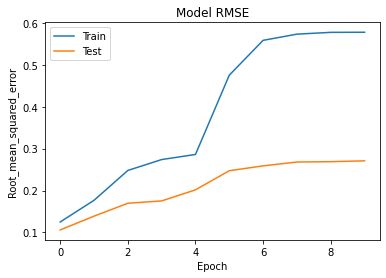

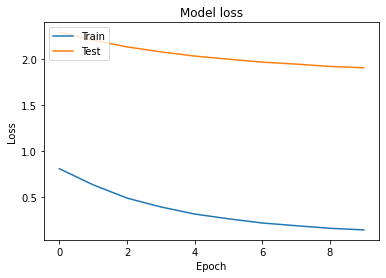


Model: 2,
Minimum RMSE at epoch: 10 = 1.3812567801330693


In [ ]:
def compile_fit_plot(model,num):
    model.summary()
    model.compile(optimizer = 'Adam', loss = rmse, metrics = ['accuracy'])
      #TODO: Train model
    history=model.fit(x=X_train_array, y=y_train, batch_size=250, epochs=10,
                        verbose=1, validation_data=(X_test_array, y_test))
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model RMSE')
    plt.ylabel('Root_mean_squared_error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    import math
    # Show the best validation RMSE
    min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
    print(f"\nModel: {num},\nMinimum RMSE at epoch: {idx+1} = {math.sqrt(min_val_loss)}")
    #print ('\nModel: {:d}\n'.format(num),'Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))
compile_fit_plot(model2,2)

Our model using Embedding layer holds better RMSE(1.344) in comparison to the models applied in the 3rd part.